## **LA CRIMES EDA**

This notebook is a project focused on conducting EDA for a LA Crime Dataset ranging from Jan 2020 to Dec 2022

Questions to Answer:



1.   Which hour has the highest frequency of crimes?
2.   What are the top 3 crimes committed during that hour?
2.   Which area has the largest frequency of night crimes? (between 6pm and 4am)
3.   Identify the number of crimes committed against victimes by age group (<18, 18-24, 25-34, 35-44, 45-54, 55-64, 65+).
4.   What are some other points of interest?



In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import requests
from io import StringIO
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importing the data
crime_df = pd.read_csv("/content/drive/MyDrive/Data_Sets/LA_Crime/crime_in_la.csv")
crime_df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


In [ ]:
#printing the info
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495410 entries, 0 to 495409
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           495410 non-null  int64  
 1   DATE OCC        495410 non-null  object 
 2   TIME OCC        495410 non-null  object 
 3   AREA            495410 non-null  int64  
 4   AREA NAME       495410 non-null  object 
 5   Rpt Dist No     495410 non-null  int64  
 6   Crm Cd          495410 non-null  int64  
 7   Crm Cd Desc     495410 non-null  object 
 8   Mocodes         495410 non-null  object 
 9   Vict Age        495410 non-null  int64  
 10  Vict Sex        495410 non-null  object 
 11  Vict Descent    495410 non-null  object 
 12  Premis Desc     495197 non-null  object 
 13  Weapon Used Cd  495410 non-null  float64
 14  Weapon Desc     495410 non-null  object 
 15  Status          495410 non-null  object 
 16  Status Desc     495410 non-null  object 
 17  LOCATION  

In [ ]:
#dropping columns not used in analysis
crime_df = crime_df.drop(['DR_NO', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Weapon Used Cd', 'Status'], axis=1)

In [ ]:
#renaming columns of interest to simplify field names
crime = crime_df.rename(columns = {'DATE OCC':'Date', 'TIME OCC':'Time', 'AREA NAME':'Area', 'Crm Cd Desc':'Crime', 'Vict Age':'V_Age', 'Vict Sex':'V_Sex', 'Vict Descent':'V_Desc', 'Prmis Desc':'Premis_Desc', 'Weapon Desc':'Weapon', 'Status Desc':'Status', 'LOCATION':'Location'})

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495410 entries, 0 to 495409
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         495410 non-null  object 
 1   Time         495410 non-null  object 
 2   Area         495410 non-null  object 
 3   Crime        495410 non-null  object 
 4   Mocodes      495410 non-null  object 
 5   V_Age        495410 non-null  int64  
 6   V_Sex        495410 non-null  object 
 7   V_Desc       495410 non-null  object 
 8   Premis Desc  495197 non-null  object 
 9   Weapon       495410 non-null  object 
 10  Status       495410 non-null  object 
 11  Location     495410 non-null  object 
 12  LAT          495410 non-null  float64
 13  LON          495410 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 52.9+ MB


In [ ]:
#changing the data type of 'Date' and 'Time' to **datetime**
crime["Date"] = pd.to_datetime(crime["Date"])
crime["Time"] = pd.to_datetime(crime["Time"], errors='coerce')

#creating a 'time' and 'hour' column
crime["time"] = crime['Time'].dt.time
crime["hour"] = crime['Time'].dt.hour
crime.head()

,Date,Time,Area,Crime,Mocodes,V_Age,V_Sex,V_Desc,Premis Desc,Weapon,Status,Location,LAT,LON,time,hour
0,2020-08-01,2023-10-25 22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978,22:30:00,22
1,2020-01-01,2023-10-25 03:30:00,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545,03:30:00,3
2,2020-01-01,2023-10-25 17:30:00,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,17:30:00,17
3,2020-01-01,2023-10-25 04:15:00,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,14400 TITUS ST,34.2198,-118.4468,04:15:00,4
4,2020-01-01,2023-10-25 00:30:00,Central,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY,34.0452,-118.2534,00:30:00,0


In [ ]:
#Function to observe unique values and other important metadata
def get_unique_values(df):

    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [ ]:
#Printing the metadata
uv_df = get_unique_values(crime)
display(uv_df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Date,881,-,datetime64[ns]
1,Time,1439,-,datetime64[ns]
2,Area,21,-,object
3,Crime,136,-,object
4,Mocodes,178790,-,object
5,V_Age,101,-,int64
6,V_Sex,4,"[F, M, X, H]",object
7,V_Desc,19,-,object
8,Premis Desc,306,-,object
9,Weapon,78,-,object


In [ ]:
#observing numerical summary data
print(crime.describe(datetime_is_numeric=True))

                                Date                           Time  \
count                         495410                         495410   
mean   2021-03-29 05:20:46.894490880  2023-10-25 13:34:09.822651904   
min              2020-01-01 00:00:00            2023-10-25 00:01:00   
25%              2020-08-10 00:00:00            2023-10-25 09:00:00   
50%              2021-03-28 00:00:00            2023-10-25 14:30:00   
75%              2021-10-31 00:00:00            2023-10-25 19:00:00   
max              2022-12-05 00:00:00            2023-10-25 23:59:00   
std                              NaN                            NaN   

               V_Age            LAT            LON           hour  
count  495410.000000  495410.000000  495410.000000  495410.000000  
mean       29.950849      33.917114    -117.811277      13.278527  
min        -1.000000       0.000000    -118.667600       0.000000  
25%        11.000000      34.011200    -118.430100       9.000000  
50%        31.000000

Looking at the description of the data, we see that the min for LAT is 0 and the max for LON is 0, which does not make sense given the approximate latitudinal and longitudinal coordinates of Los Angeles. We can assume that there are records with missing latitudinal and longitudinal. These records will be removed from the dataset at this state in the data cleaning so that data can be plotted on a map more easily later on in the analysis.

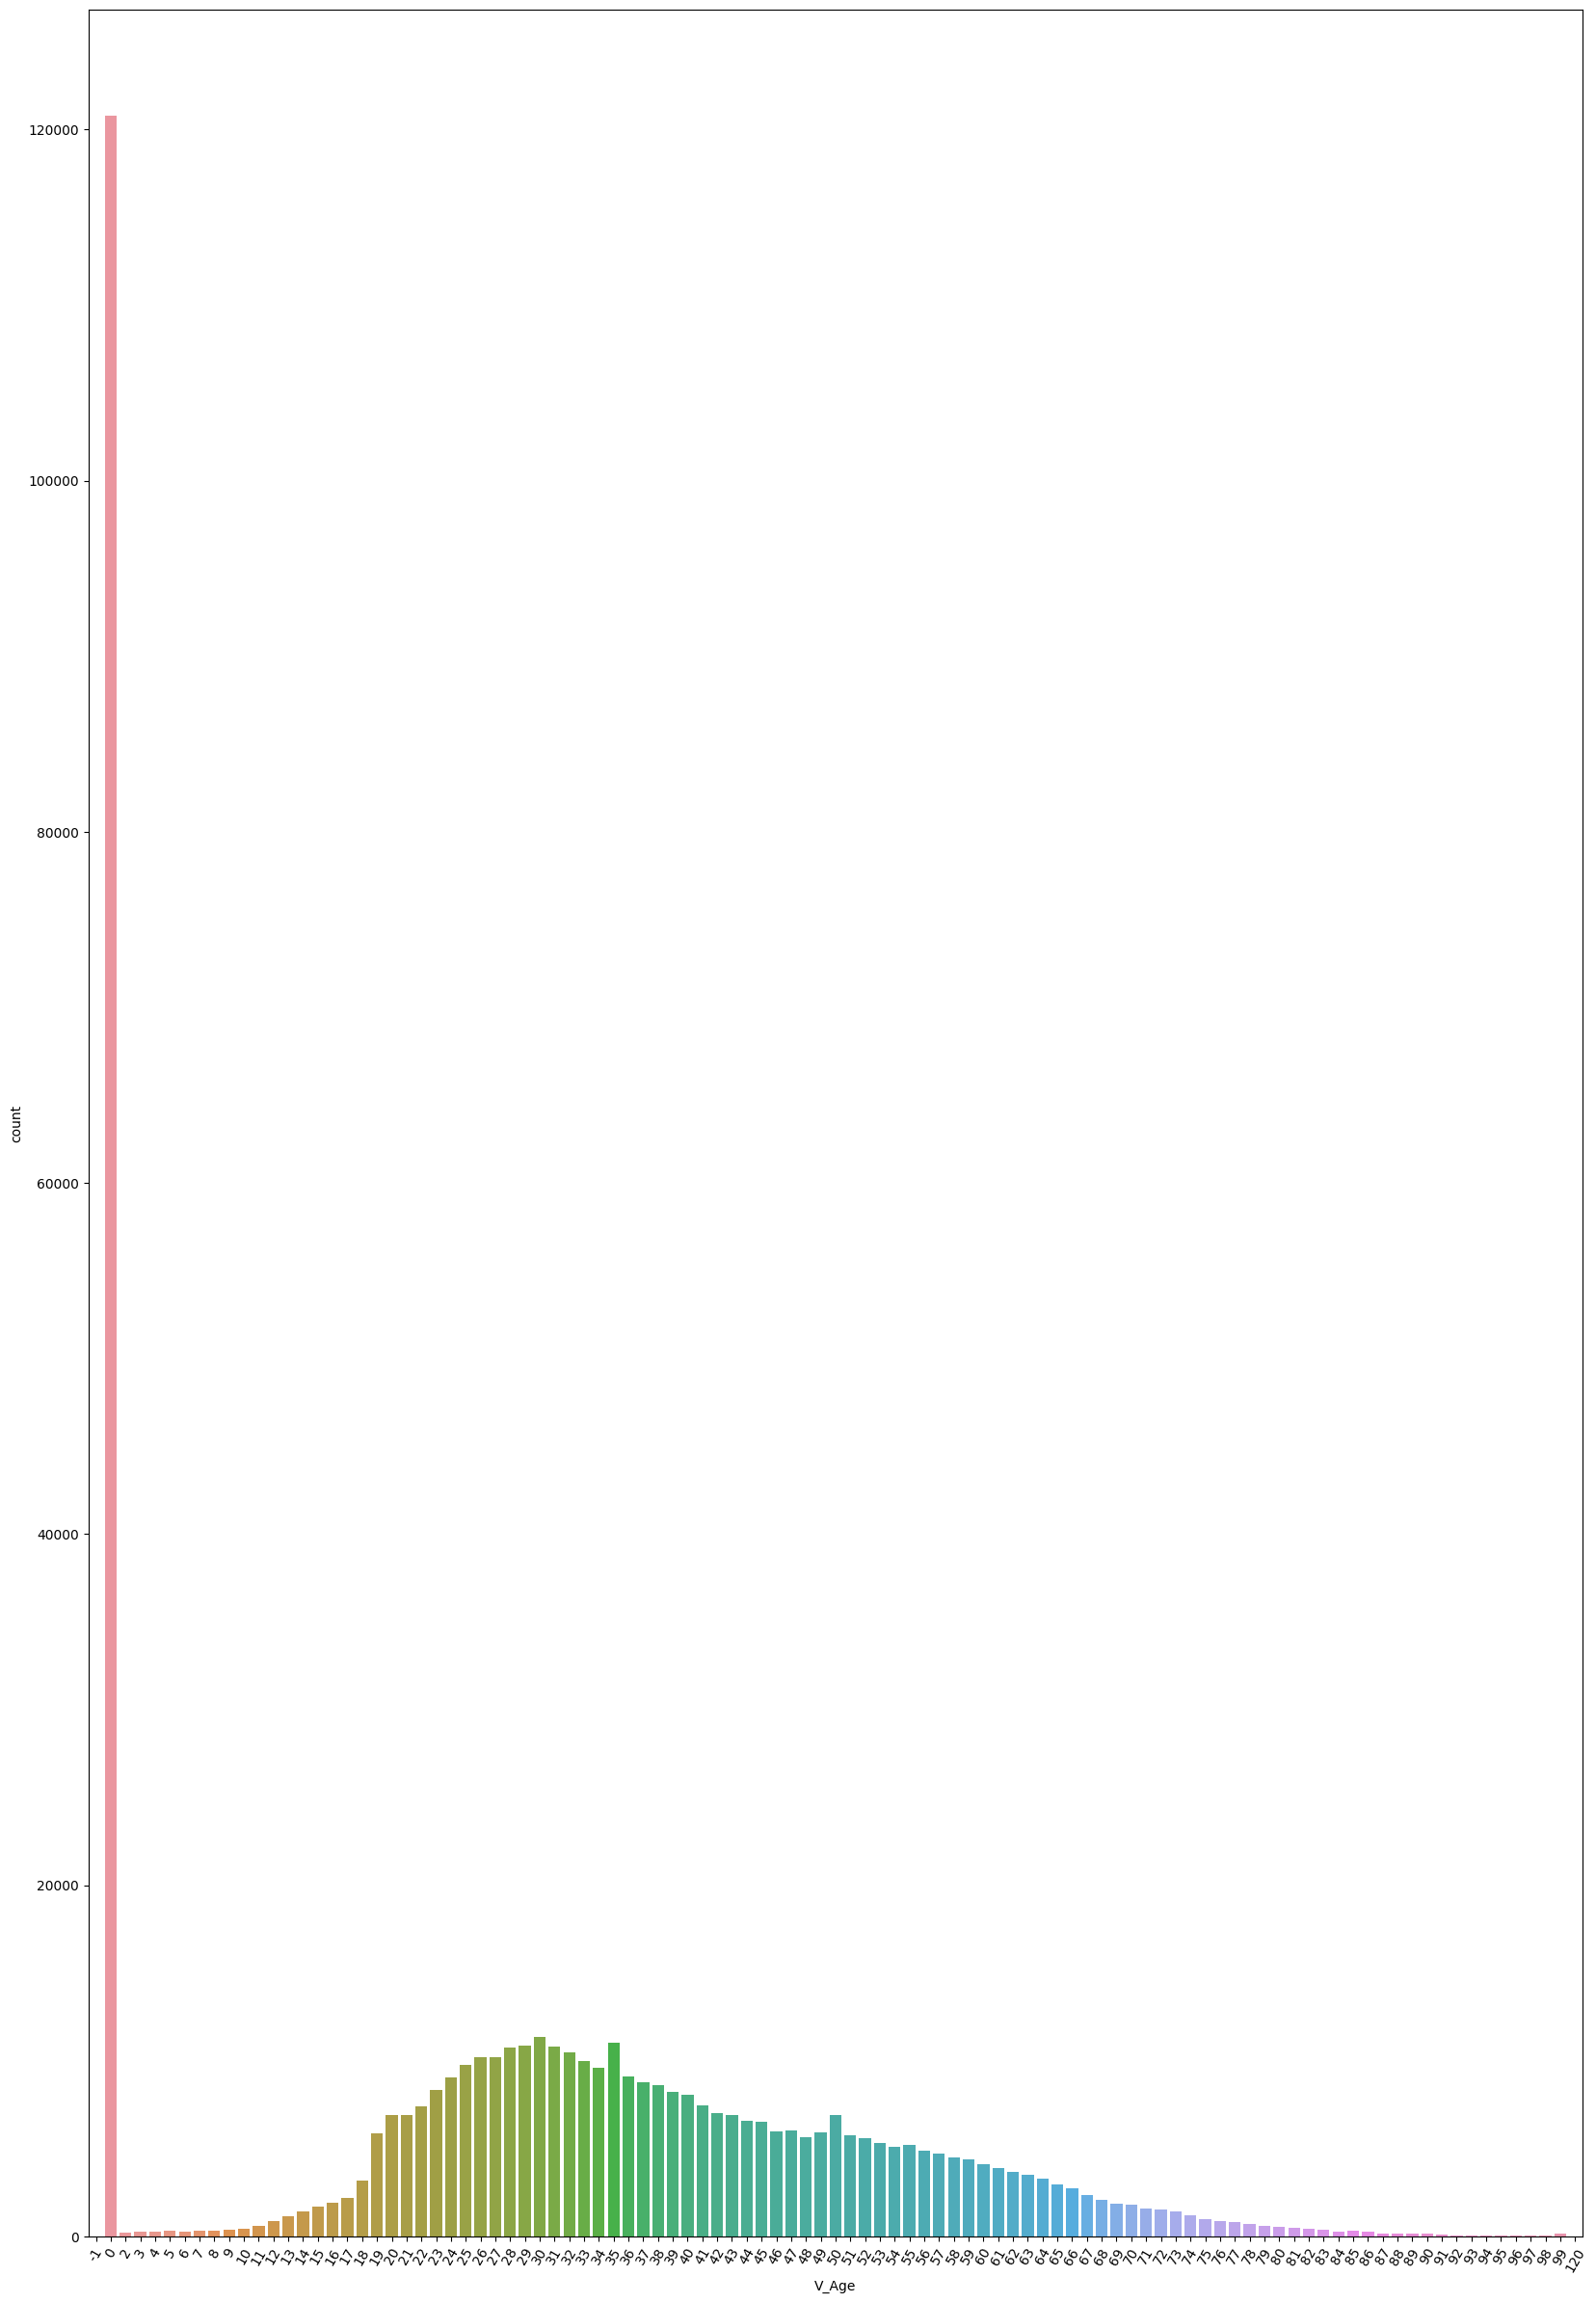

In [ ]:
#Dist of Victim Age
plt.figure(figsize=(20,30))
plt.xticks(rotation=60)

sns.countplot(x='V_Age', data=crime)

plt.show()

There are over 120,000 records in which the victim's age is 0, indicating that there is missing data. These missing records will be removed from the dataset.

In [ ]:
tohist = ['Area', 'V_Age', 'V_Sex', 'V_Desc', 'Weapon', 'Status']

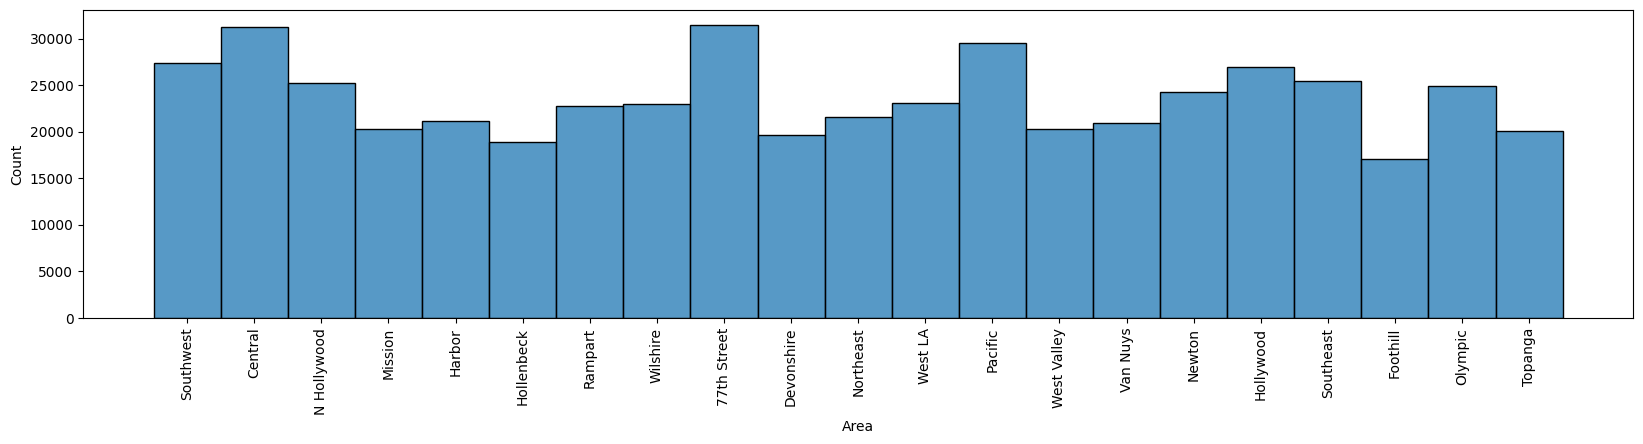

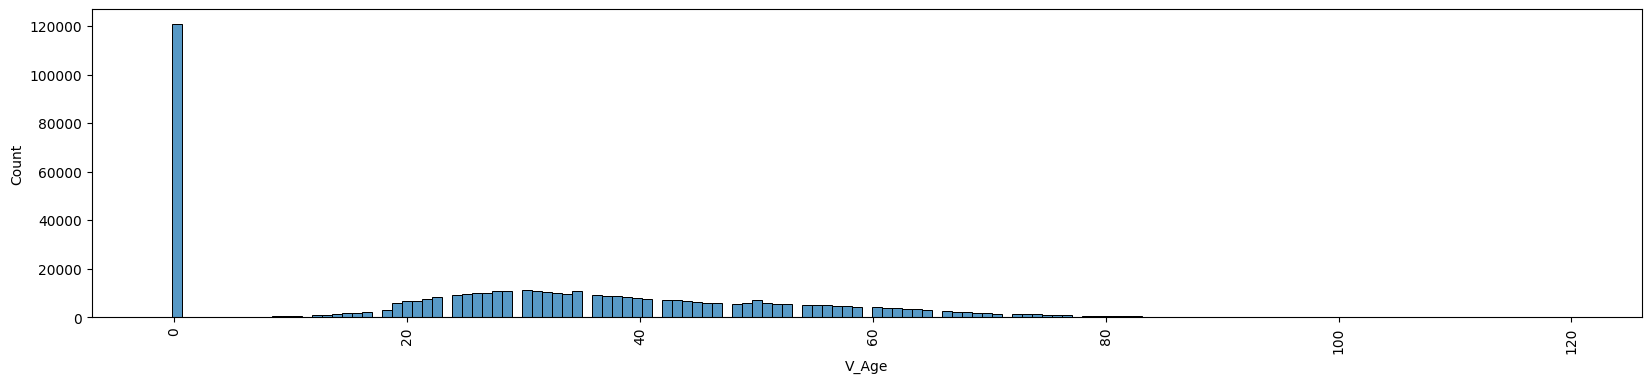

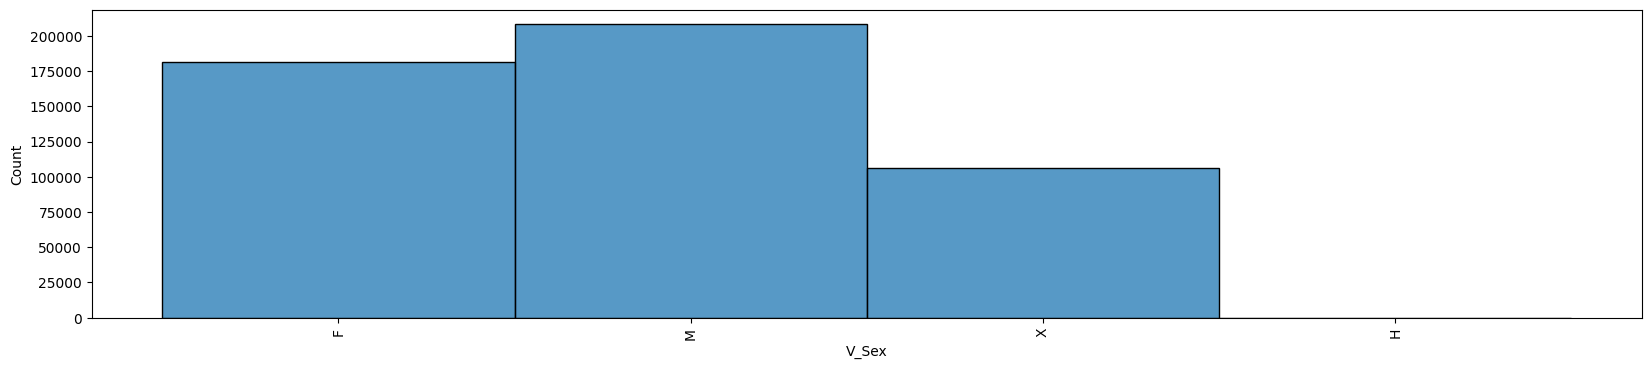

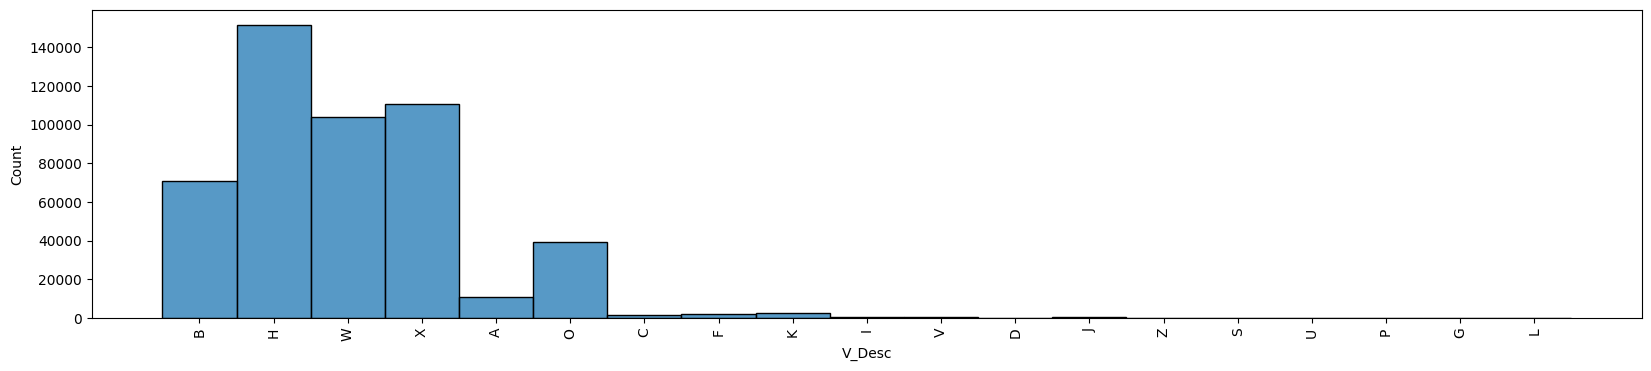

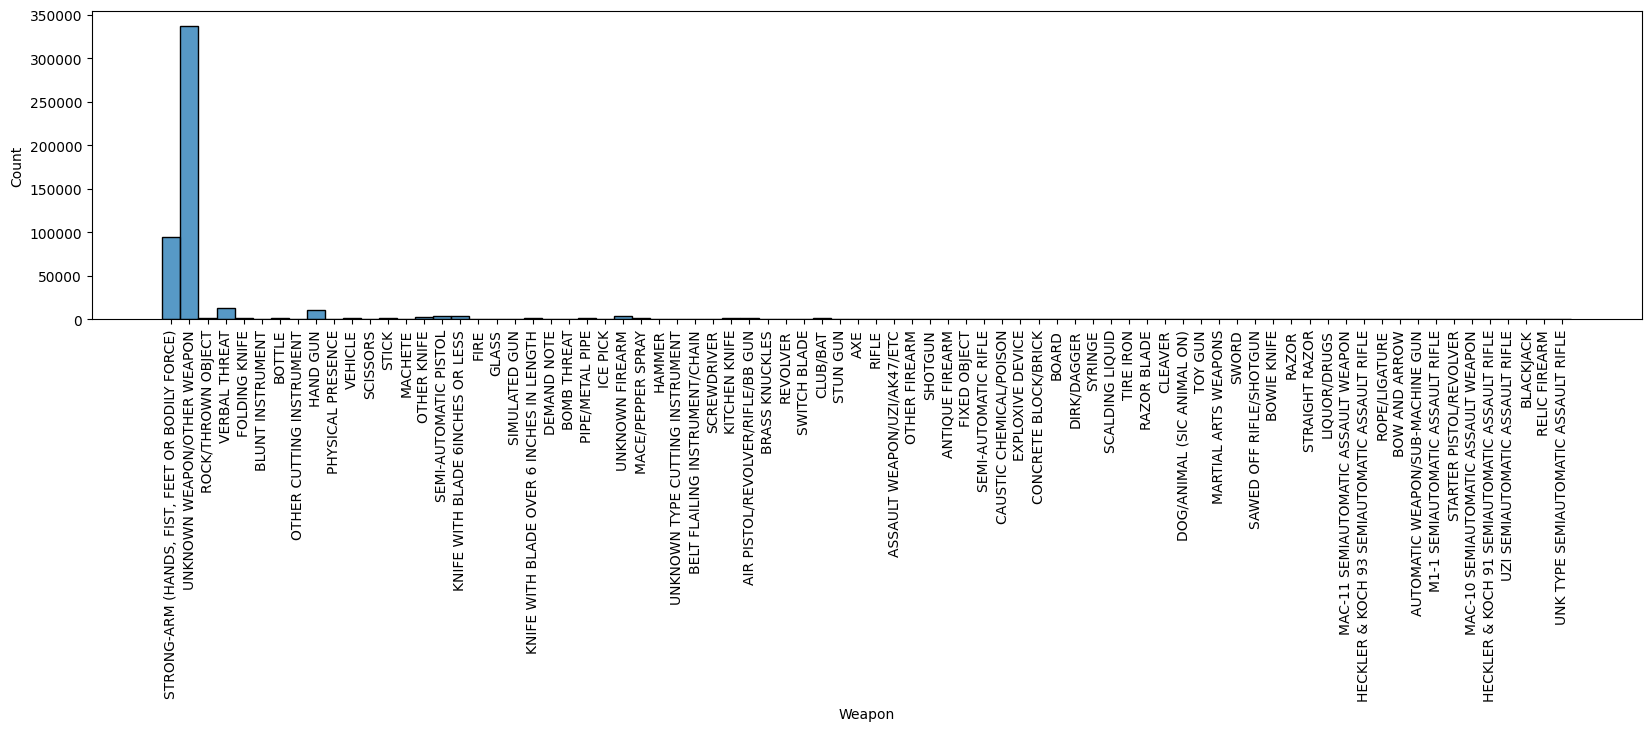

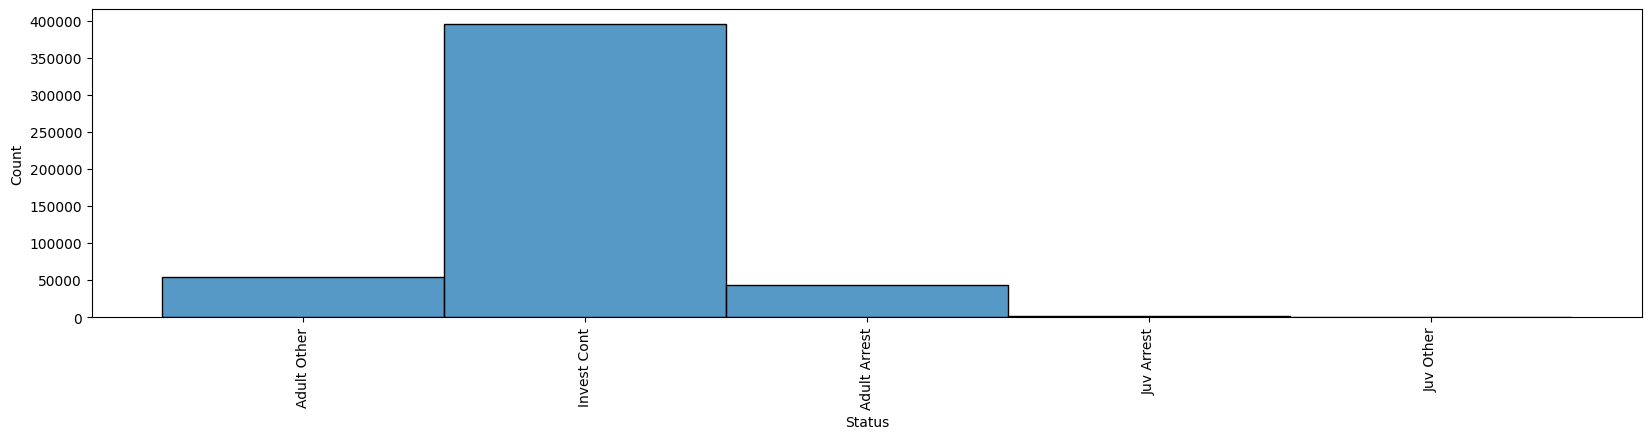

In [ ]:
for i in tohist:
    plt.figure(figsize=(20, 4))
    sns.histplot(data=crime, x=i)#, kde = True)
    plt.xticks(rotation=90)
    plt.show()

Several records indicate that V_Sex is X which could indicate that the victim identifies outside of traditional gender norms or that the data is incomplete. For the purpose of this analysis, we will assume that the data is incomplete based on the vast number of missing values in V_Age discovered prior. These incomplete records will be removed from the dataset.

In [ ]:
#Removing missing V_Age and inconclusive V_Sex records
crime = crime[(crime['V_Age'] != 0) & (crime['V_Sex'] != 'X') & (crime['LAT'] != 0) & (crime['LON'] != 0)]

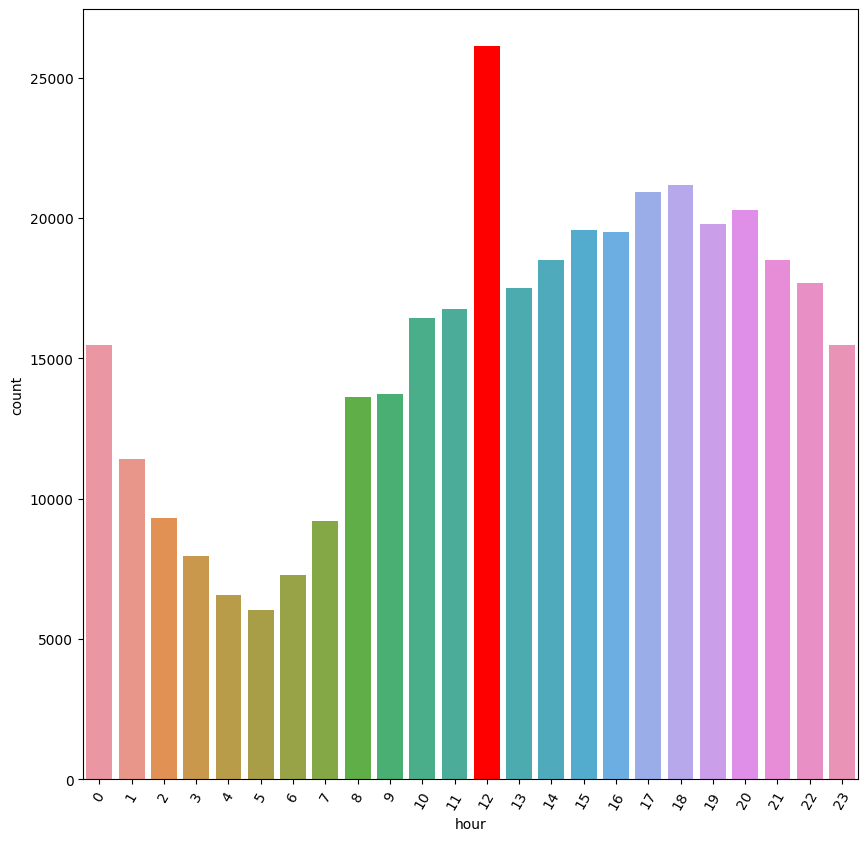

In [ ]:
#Dist of hour
plt.figure(figsize=(10,10))
plt.xticks(rotation=60)

ax = sns.countplot(x='hour', data=crime)
patch_h = [patch.get_height() for patch in ax.patches]
idx_tallest= np.argmax(patch_h)
ax.patches[idx_tallest].set_facecolor('red')

plt.show()

**Observations**

*   Highest occurence of crimes takes place between 12pm and 1pm
*   Crime rates increase steadily between 1pm and 6pm and then drop off but are still significantly high until around 1am



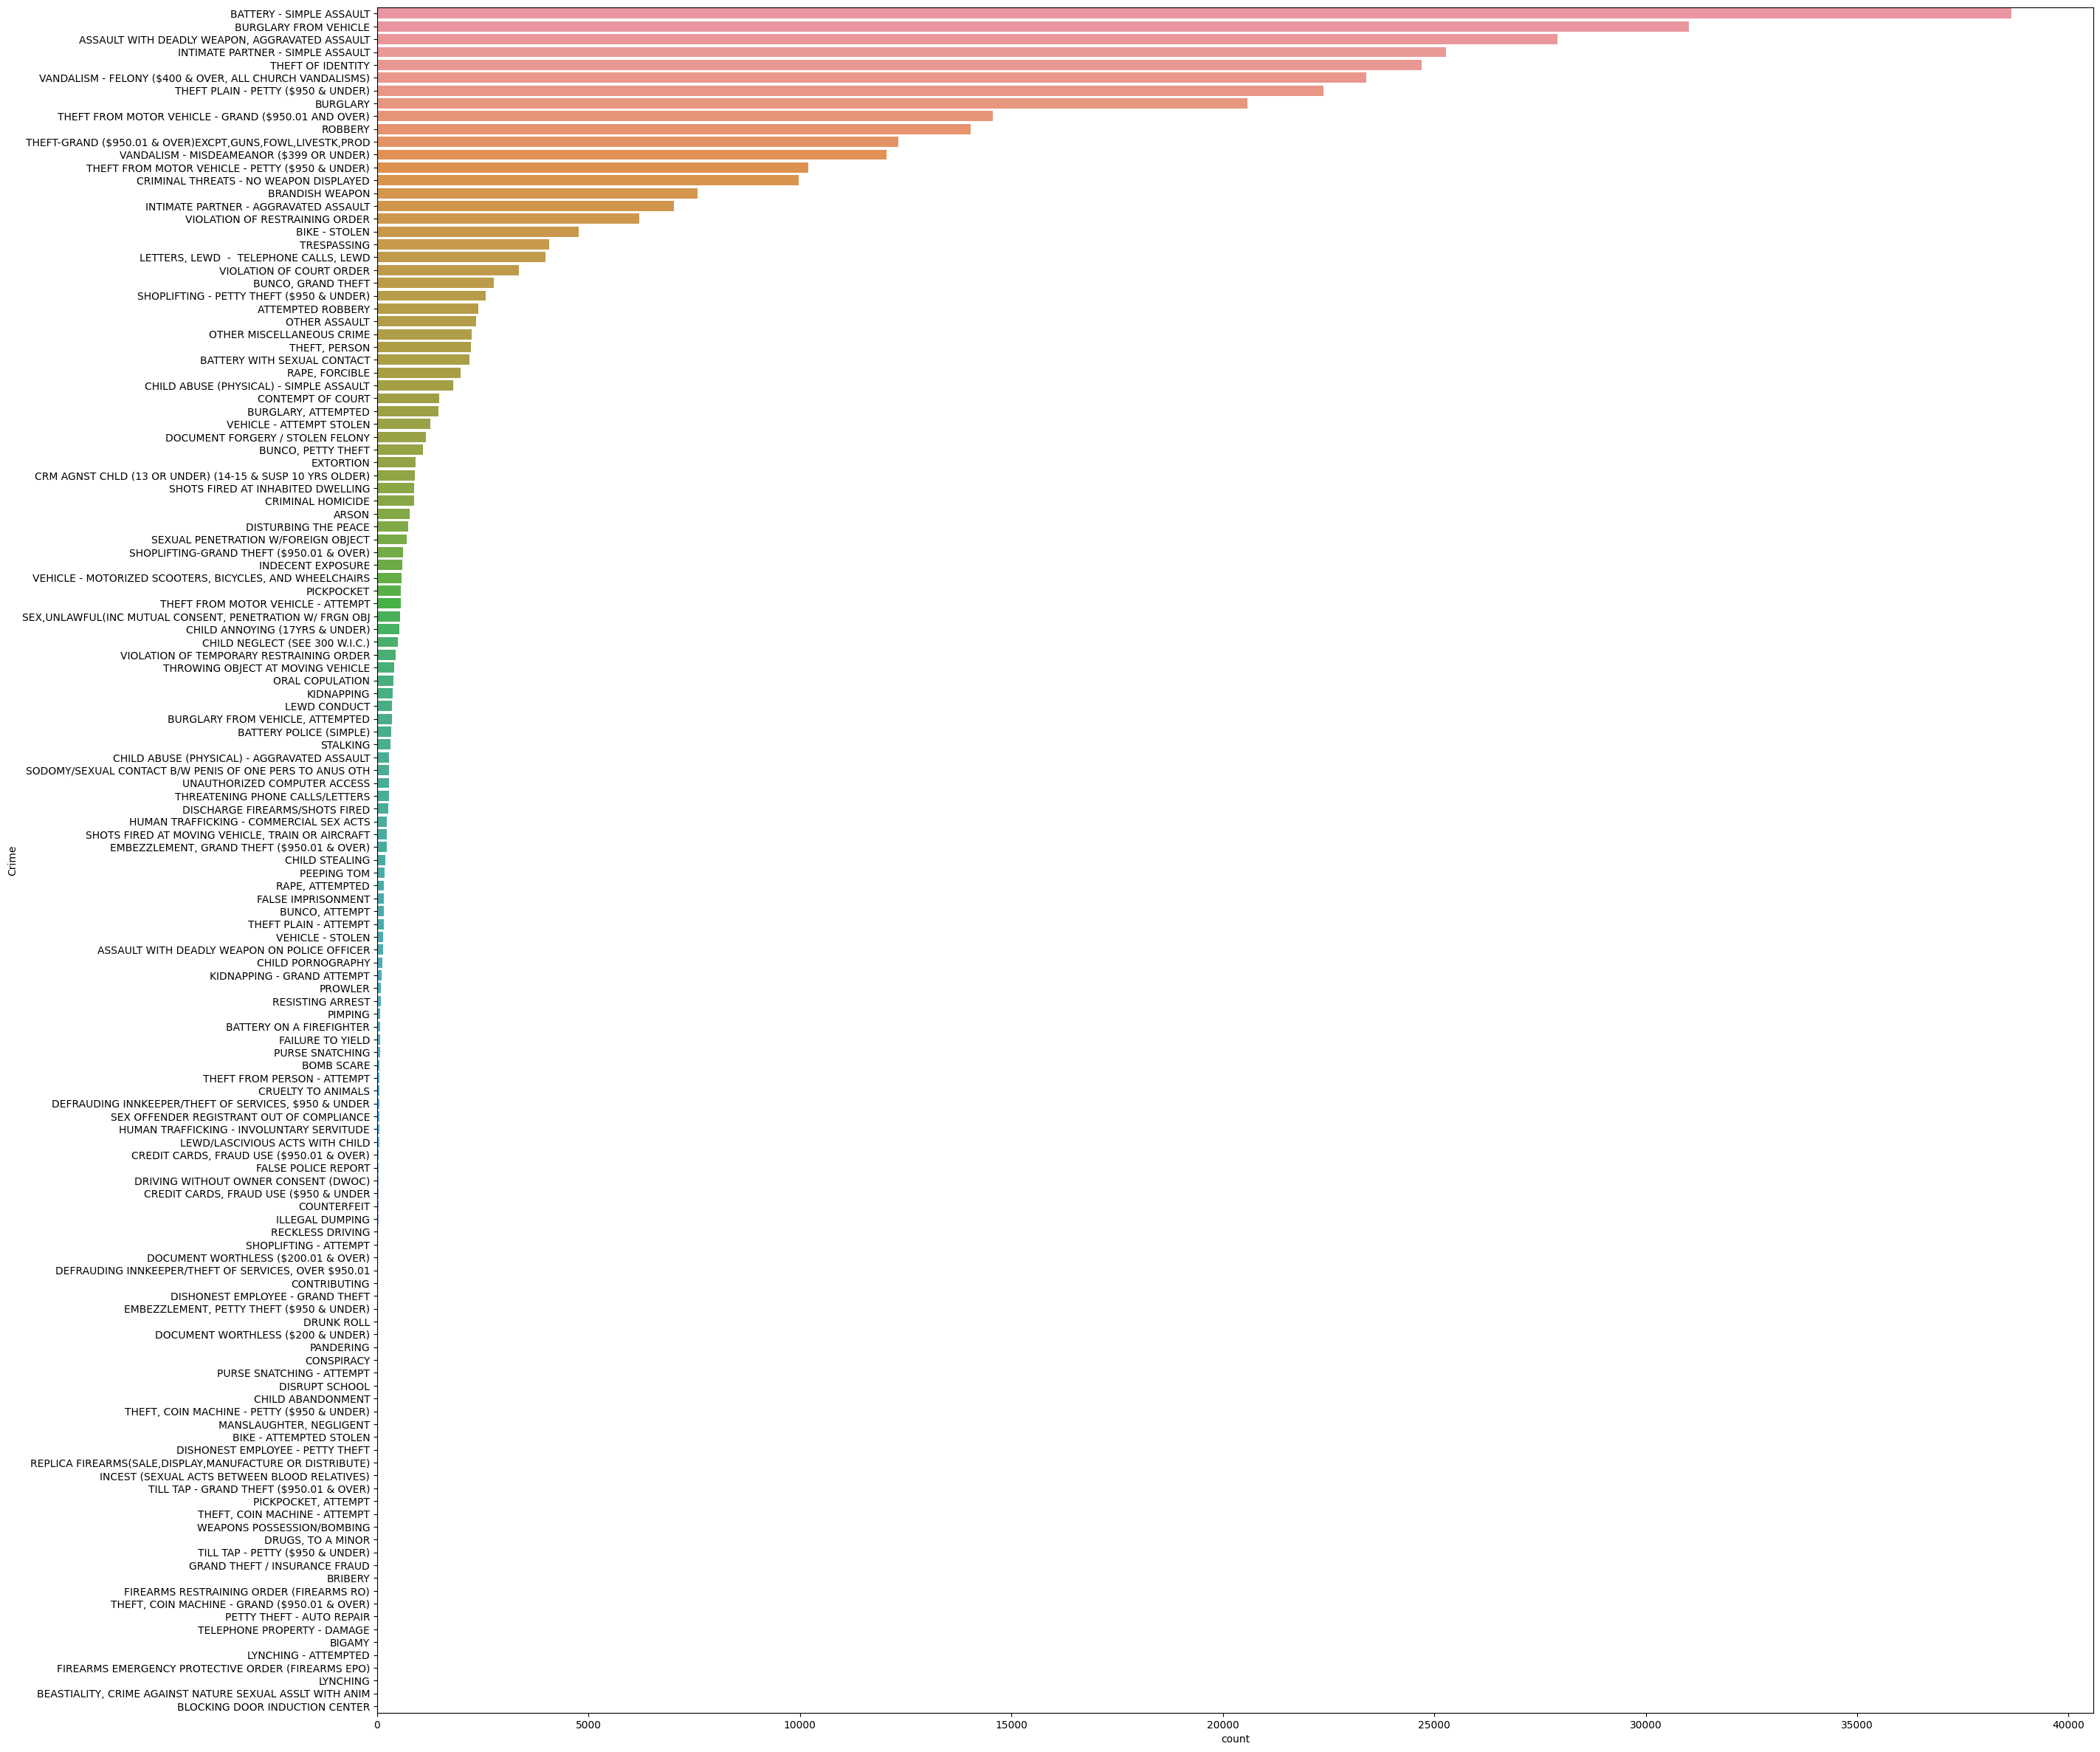

In [ ]:
#Crimes Dist
plt.figure(figsize=(30,30))
sns.countplot(y='Crime', data=crime, order=crime['Crime'].value_counts().index)
plt.show()

Overall, Battery - Simple Assault is committed most frequently

In [ ]:
#Subsetting dataframe for crimes committed between 12pm and 1pm and crimes with more than 1000 occurences
high_noon = crime[crime['hour'] == 12]
high_noon_top = high_noon[high_noon.groupby('Crime')['Crime'].transform('count') > 1000]
high_noon_top.head()

,Date,Time,Area,Crime,Mocodes,V_Age,V_Sex,V_Desc,Premis Desc,Weapon,Status,Location,LAT,LON,time,hour
40,2020-01-01,2023-10-25 12:00:00,Central,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0337 0340 0416 0445 1822 1218 2021 1019,57,M,B,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,7TH,34.0401,-118.2459,12:00:00,12
62,2020-02-01,2023-10-25 12:25:00,Central,BATTERY - SIMPLE ASSAULT,0416,60,M,O,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,7TH,34.0449,-118.2528,12:25:00,12
64,2020-01-01,2023-10-25 12:00:00,Central,BURGLARY,1822 0344 1602 0329,51,M,O,GARAGE/CARPORT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 ALPINE ST,34.0635,-118.2426,12:00:00,12
102,2020-04-01,2023-10-25 12:30:00,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414 0429,40,F,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,100 PASEO DE LA PLAZA,34.0615,-118.2412,12:30:00,12
119,2020-04-01,2023-10-25 12:30:00,Central,THEFT PLAIN - PETTY ($950 & UNDER),0394 0344,26,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,900 NEW DEPOT ST,34.0652,-118.2451,12:30:00,12


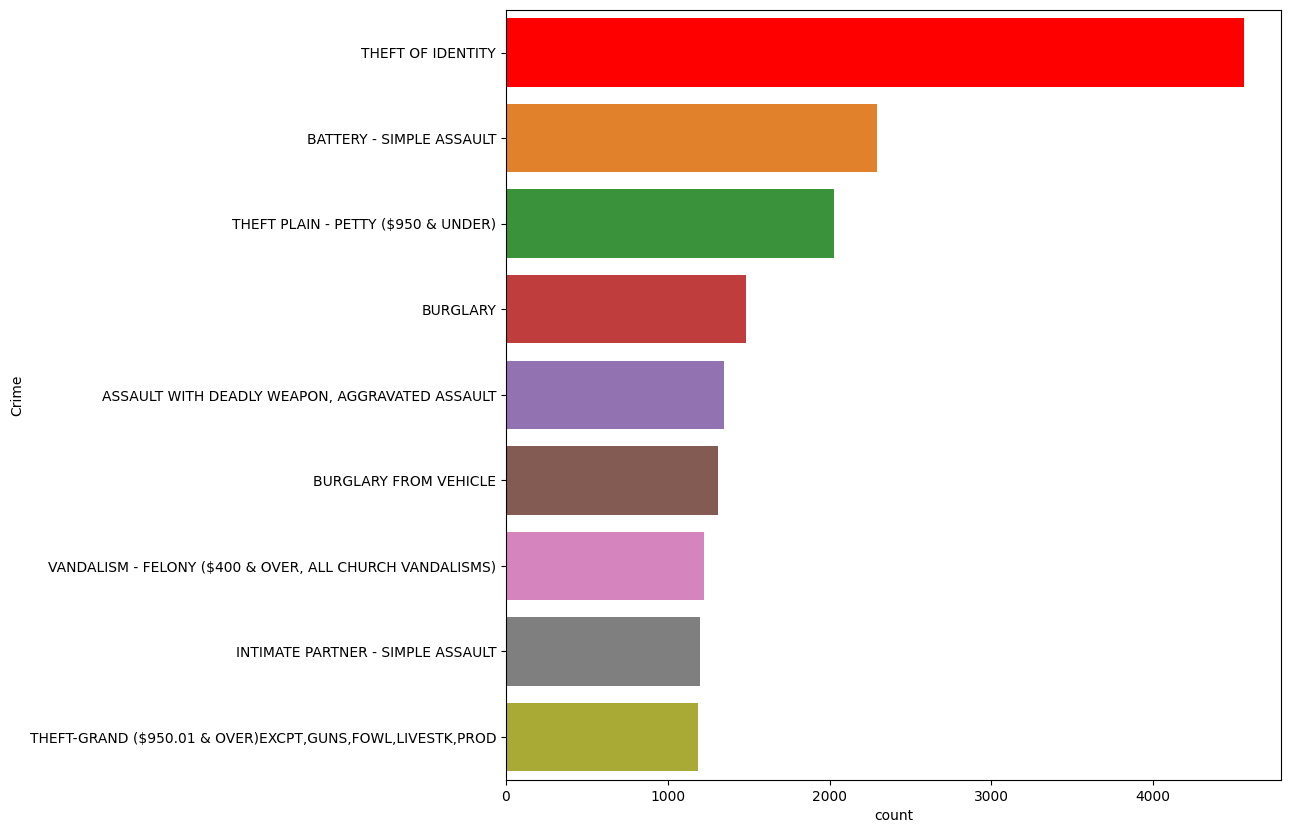

In [ ]:
#Crimes at 12 dist
plt.figure(figsize=(10,10))
ax = sns.countplot(y='Crime', data=high_noon_top, order=high_noon_top['Crime'].value_counts().index)
patch_h = [patch.get_height() for patch in ax.patches]
idx_tallest = np.argmax(patch_h)
ax.patches[idx_tallest].set_facecolor('red')

plt.show()

Between 12pm and 1pm, Identity Theft is committed most frequently.

In [ ]:
#Subsetting dataframe for crimes committed at night (between hours of 6pm and 4am)
night_crimes = crime[~crime['hour'].between(5,17)]
night_crimes.head()

,Date,Time,Area,Crime,Mocodes,V_Age,V_Sex,V_Desc,Premis Desc,Weapon,Status,Location,LAT,LON,time,hour
0,2020-08-01,2023-10-25 22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978,22:30:00,22
1,2020-01-01,2023-10-25 03:30:00,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545,03:30:00,3
4,2020-01-01,2023-10-25 00:30:00,Central,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY,34.0452,-118.2534,00:30:00,0
7,2020-04-01,2023-10-25 02:00:00,Central,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344 1402,23,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 BERNARD ST,34.0677,-118.2398,02:00:00,2
8,2020-04-01,2023-10-25 22:00:00,Central,BURGLARY FROM VEHICLE,1822 1414 0344 1307,29,M,A,STREET,ROCK/THROWN OBJECT,Invest Cont,15TH,34.0359,-118.2648,22:00:00,22


Central        11175
77th Street    10749
Hollywood       9449
Pacific         9331
Southwest       9009
Southeast       8767
N Hollywood     8195
Olympic         8137
Rampart         7723
Wilshire        7533
Name: Area, dtype: int64


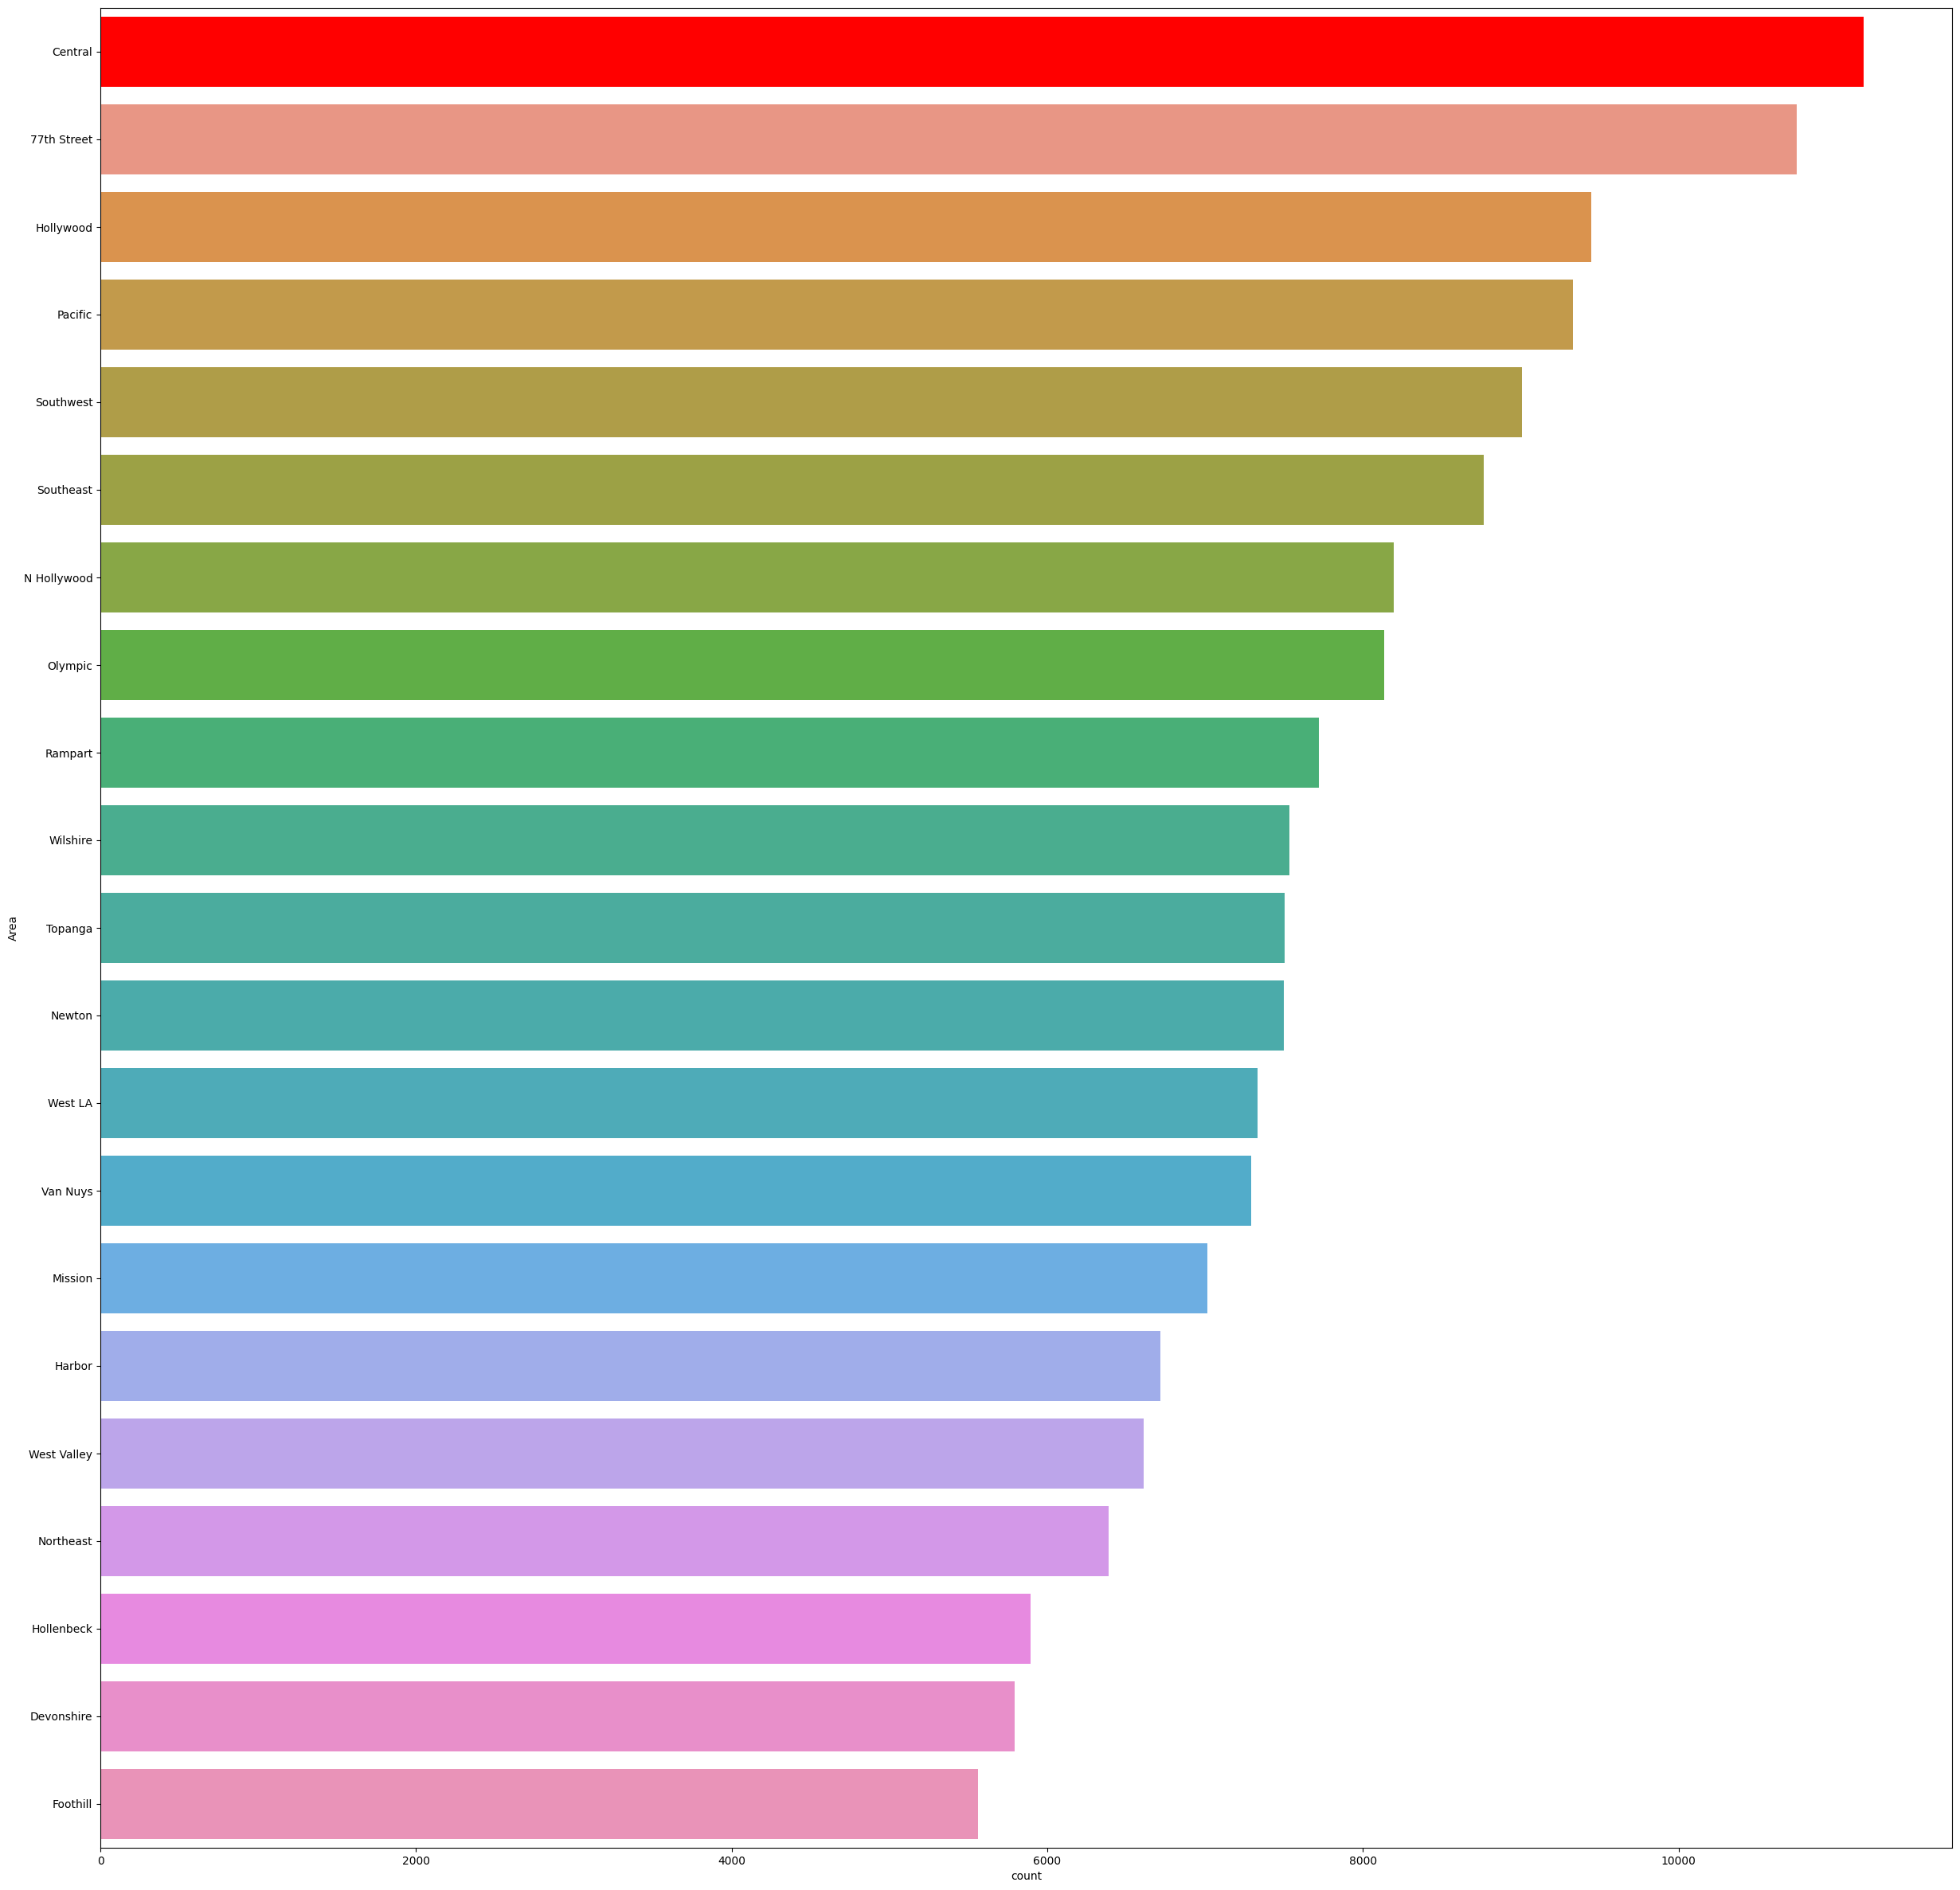

In [ ]:
# Top 10 Locations for crimes committed at night
top10_loc = night_crimes['Area'].value_counts().sort_values(ascending=False)
print(top10_loc.head(10))

# Subsetting Top 10 night crimes dataframe
# nc_top10 = night_crimes['Location'].groupby(night_crimes['Location']).value_counts().nlargest(10)
# nc_top10.head()

# Visualizing top 10 locations for crimes
plt.figure(figsize=(30,30))
ax = sns.countplot(y='Area', data=night_crimes, order=night_crimes['Area'].value_counts().index)
patch_h = [patch.get_height() for patch in ax.patches]
idx_tallest= np.argmax(patch_h)
ax.patches[idx_tallest].set_facecolor('red')

plt.show()

The Area with the largest frequency of night crimes is Central with 77th Street falling close behind

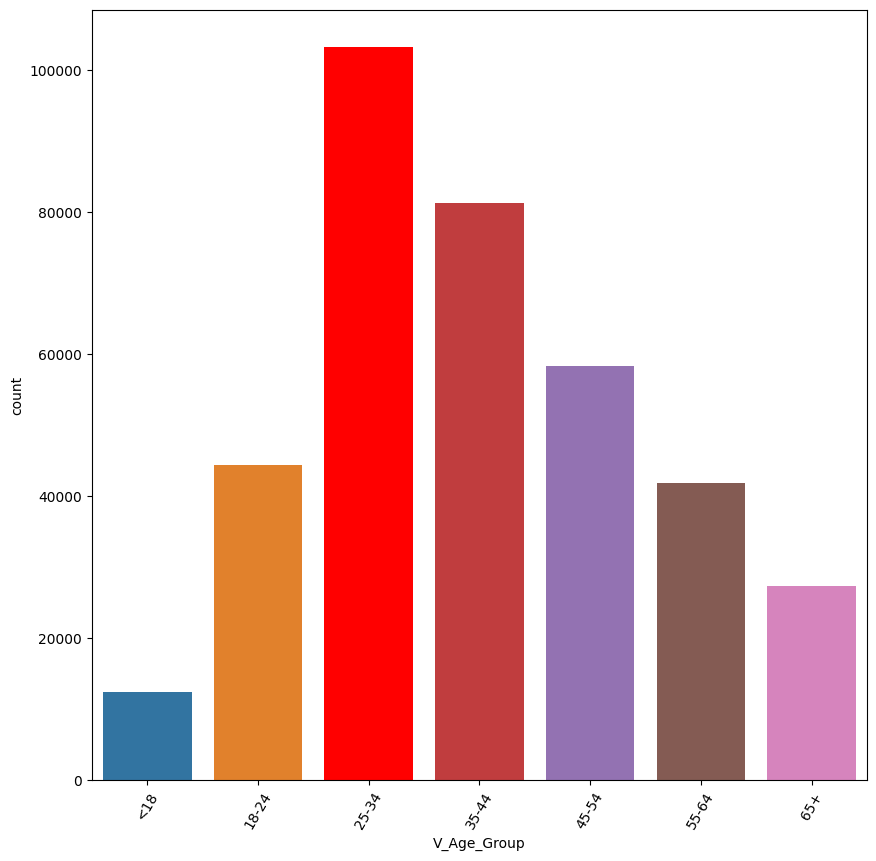

In [ ]:
#Creating bins manually to avoid overlap bucketing that occurs with pd.cut
ag_df = crime[['V_Age']]
ag_list = pd.Categorical(['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])


def get_ag(v):
    if v < 18:
        return ag_list[0]
    elif v >= 18 and v < 25:
        return ag_list[1]
    elif v >= 25 and v < 35:
        return ag_list[2]
    elif v >= 35 and v < 45:
        return ag_list[3]
    elif v >= 45 and v < 55:
        return ag_list[4]
    elif v >= 55 and v < 65:
        return ag_list[5]
    elif v >= 65:
        return ag_list[6]

ag_df['V_Age_Group'] = ag_df.V_Age.apply(get_ag)

#Displaying
plt.figure(figsize=(10,10))
plt.xticks(rotation=60)

ax = sns.countplot(x='V_Age_Group', data=ag_df, order=ag_list)
patch_h = [patch.get_height() for patch in ax.patches]
idx_tallest= np.argmax(patch_h)
ax.patches[idx_tallest].set_facecolor('red')

plt.show()

The largest number of crimes is committed against individuals aged 25-34

Plotting data on map of LA

In [ ]:
# Subsetting data to include only the top 3 locations for night crimes (Central, 77th Street, and Hollywood)

crime_top3_night = night_crimes[(night_crimes['Area'] == 'Central') | (night_crimes['Area'] == '77th Street') | (night_crimes['Area'] == 'Hollywood')]
crime_top3_night.head()

,Date,Time,Area,Crime,Mocodes,V_Age,V_Sex,V_Desc,Premis Desc,Weapon,Status,Location,LAT,LON,time,hour
1,2020-01-01,2023-10-25 03:30:00,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545,03:30:00,3
4,2020-01-01,2023-10-25 00:30:00,Central,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY,34.0452,-118.2534,00:30:00,0
7,2020-04-01,2023-10-25 02:00:00,Central,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344 1402,23,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 BERNARD ST,34.0677,-118.2398,02:00:00,2
8,2020-04-01,2023-10-25 22:00:00,Central,BURGLARY FROM VEHICLE,1822 1414 0344 1307,29,M,A,STREET,ROCK/THROWN OBJECT,Invest Cont,15TH,34.0359,-118.2648,22:00:00,22
12,2020-08-01,2023-10-25 18:05:00,Central,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 1402 0344 1822,24,F,H,"COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, E...",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,100 S LOS ANGELES ST,34.0515,-118.2424,18:05:00,18


In [ ]:
#Subsetting dataframe for night crimes with more than 1000 occurences
crime_areatop3_topcrimes = crime_top3_night[crime_top3_night.groupby('Crime')['Crime'].transform('count') > 1000]
crime_areatop3_topcrimes.head()

,Date,Time,Area,Crime,Mocodes,V_Age,V_Sex,V_Desc,Premis Desc,Weapon,Status,Location,LAT,LON,time,hour
1,2020-01-01,2023-10-25 03:30:00,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545,03:30:00,3
7,2020-04-01,2023-10-25 02:00:00,Central,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344 1402,23,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 BERNARD ST,34.0677,-118.2398,02:00:00,2
8,2020-04-01,2023-10-25 22:00:00,Central,BURGLARY FROM VEHICLE,1822 1414 0344 1307,29,M,A,STREET,ROCK/THROWN OBJECT,Invest Cont,15TH,34.0359,-118.2648,22:00:00,22
18,2020-01-19,2023-10-25 20:00:00,Central,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2004 0305 0411 1202 1414 1402 1822 0906,71,M,W,PUBLIC RESTROOM/OUTSIDE*,UNKNOWN WEAPON/OTHER WEAPON,Adult Arrest,ALAMEDA,34.0578,-118.2371,20:00:00,20
25,2020-01-30,2023-10-25 00:55:00,Central,BURGLARY FROM VEHICLE,0344 1605 1611 1822 0385 0321,24,M,H,STREET,UNKNOWN WEAPON/OTHER WEAPON,Adult Arrest,18TH ST,34.0317,-118.2626,00:55:00,0


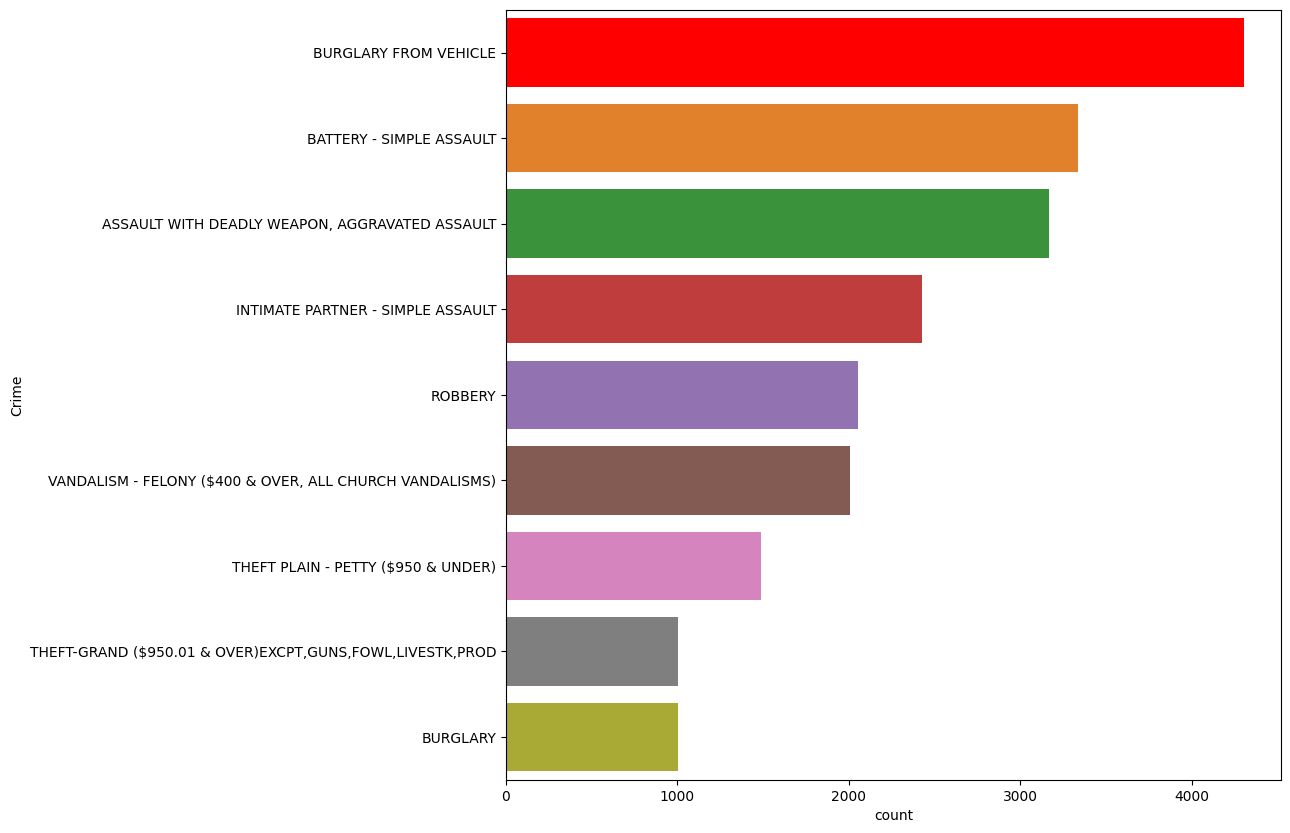

In [ ]:
# Night crimes dist
plt.figure(figsize=(10,10))
ax = sns.countplot(y='Crime', data=crime_areatop3_topcrimes, order=crime_areatop3_topcrimes['Crime'].value_counts().index)
patch_h = [patch.get_height() for patch in ax.patches]
idx_tallest = np.argmax(patch_h)
ax.patches[idx_tallest].set_facecolor('red')

plt.show()

In [ ]:
# Plotting

fig = px.scatter_geo(crime_areatop3_topcrimes,
                     lat=crime_areatop3_topcrimes['LAT'],
                     lon=crime_areatop3_topcrimes['LON'],
                     color='Crime',
                     color_discrete_sequence=px.colors.qualitative.Vivid,
                     size='V_Age',
                     opacity=0.6)
fig.update_geos(fitbounds='locations')
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

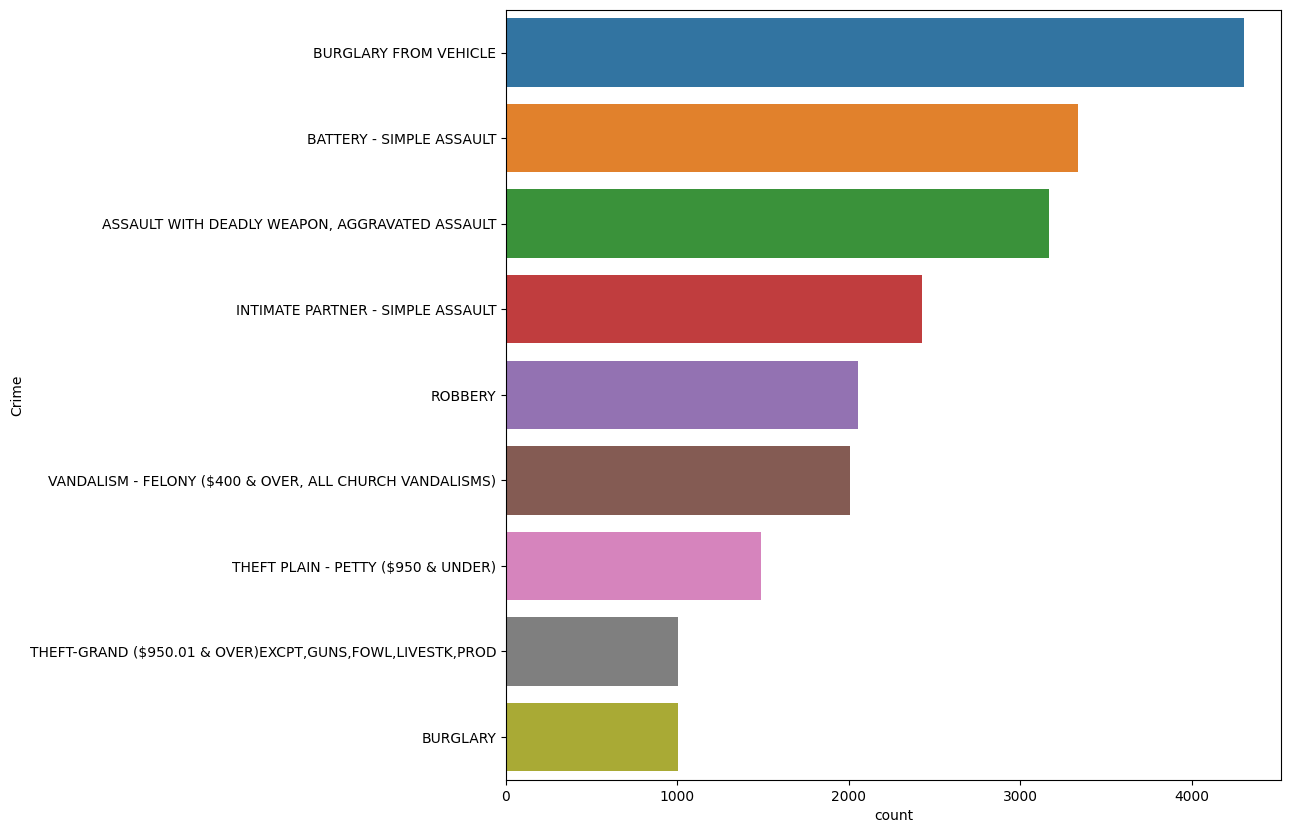

In [ ]:
#SHOW WHICH CRIME IS THE MOST FREQUENT IN THE DATASET WITH A SIMPLE BAR CHART
#Crimes Dist
plt.figure(figsize=(10,10))
sns.countplot(y='Crime', data=crime_areatop3_topcrimes, order=crime_areatop3_topcrimes['Crime'].value_counts().index)
plt.show()